In [1]:
import os
import pandas as pd
import numpy as np
os.getcwd()


'C:\\Users\\Amandeep\\Desktop\\ResearchProject\\data-driven-svd-regression\\exploratory_analysis'

# Analyzing the formatted_flu.csv file

In [6]:
df = pd.read_csv("../analysis_data/formatted_flu.csv")
print(df.shape)
print(df.columns)

(9331, 10)
Index(['date', 'location', 'location_name', 'population', 'value', 'season',
       'season_week', 'epiyear', 'epiweek', 'weekly_rate'],
      dtype='object')


In [17]:
print(df.head())
print(df.dtypes)
print(df.describe())

         date location location_name  population  value     season  \
0  2020-10-24       01       Alabama     5108468    3.0  2020/2021   
1  2020-10-31       01       Alabama     5108468   18.0  2020/2021   
2  2020-11-07       01       Alabama     5108468   21.0  2020/2021   
3  2020-11-14       01       Alabama     5108468   25.0  2020/2021   
4  2020-11-21       01       Alabama     5108468   11.0  2020/2021   

   season_week  epiyear  epiweek  weekly_rate  
0            3     2020       43     0.058165  
1            4     2020       44     0.348993  
2            5     2020       45     0.407158  
3            6     2020       46     0.484712  
4            7     2020       47     0.213273  
date              object
location          object
location_name     object
population         int64
value            float64
season            object
season_week        int64
epiyear            int64
epiweek            int64
weekly_rate      float64
dtype: object
         population        

In [10]:
df.isna().sum()

date             0
location         0
location_name    0
population       0
value            0
season           0
season_week      0
epiyear          0
epiweek          0
weekly_rate      0
dtype: int64

# Checking time period & Epiweek

In [15]:
print(df["date"].min(), df["date"].max())
print(df["season"].unique())
print(df["season_week"].min(), df["season_week"].max())
print(df["season_week"].value_counts().sort_index())

2020-10-03 2025-12-27
['2020/2021' '2021/2022' '2022/2023' '2023/2024' '2024/2025' '2025/2026']
0 32
season_week
0     272
1     278
2     303
3     318
4     318
5     318
6     318
7     318
8     318
9     318
10    318
11    318
12    318
13    265
14    265
15    265
16    265
17    265
18    265
19    265
20    265
21    265
22    265
23    265
24    265
25    265
26    265
27    265
28    265
29    265
30    265
31    265
32    263
Name: count, dtype: int64


In [18]:
df["value"].describe()

count     9331.000000
mean       249.801629
std       1719.154140
min          0.000000
25%          5.000000
50%         24.000000
75%        100.000000
max      55483.000000
Name: value, dtype: float64

In [19]:
pa = df[df["location"] == "42"]
pa["value"].describe()

count     176.000000
mean      412.221591
std       793.389158
min         0.000000
25%        38.000000
50%       116.500000
75%       394.250000
max      4571.000000
Name: value, dtype: float64

# Plot hospitalizations over season_week (single state)

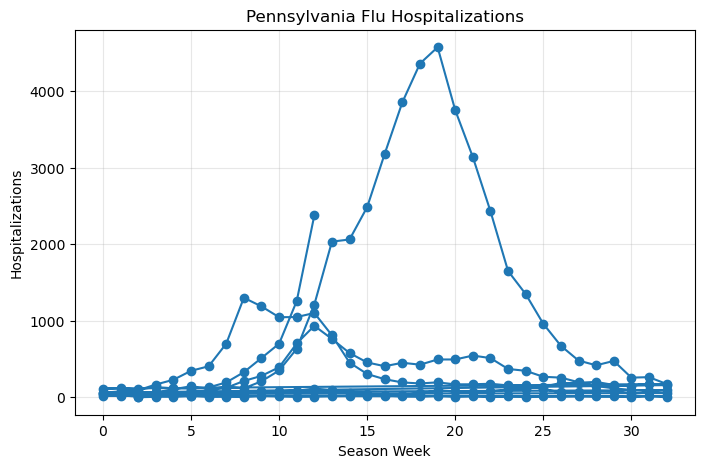

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(pa["season_week"], pa["value"], marker="o")
plt.xlabel("Season Week")
plt.ylabel("Hospitalizations")
plt.title("Pennsylvania Flu Hospitalizations")
plt.grid(alpha=0.3)
plt.show()


# Pennsylvania Flu Hospitalizations

Looking into the graph we can see that in the early weeks, the flu isn't very active.Around the middle of the season (winter months), there is a sharp increase. This represents the peak of the flu season where hospitals see the most patients.As spring approaches, the line drops back down, showing that the "flu wave" has passed.

# Comparing seasons within a state

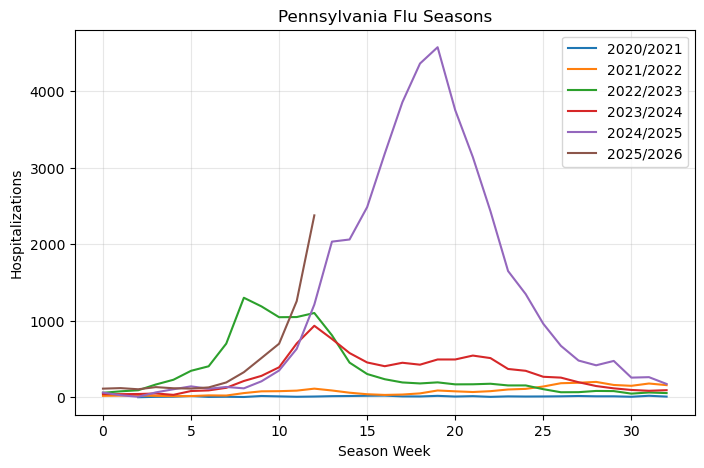

In [22]:
plt.figure(figsize=(8,5))

for season in pa["season"].unique():
    sub = pa[pa["season"] == season]
    plt.plot(sub["season_week"], sub["value"], label=season)

plt.xlabel("Season Week")
plt.ylabel("Hospitalizations")
plt.title("Pennsylvania Flu Seasons")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Pennsylvania Flu Seasons
This plot compares weekly influenza-related hospitalizations in Pennsylvania across six different flu seasons, from 2020/2021 to 2025/2026 season
All seasons have similar rise and fall pattern but the severity is different.
Some seasons, like 2024/2025, stand out as much more dangerous than others, with far higher hospitalization levels. What's especially striking is that the most recent data (shown by the brown line) suggests the 2025/2026 season is starting earlier and climbing faster than most past seasons, coming close to the most severe year on record.
Flu seasons seem predictable in when they happen, but much harder to predict in how bad they will be.

# Multi-state comparison

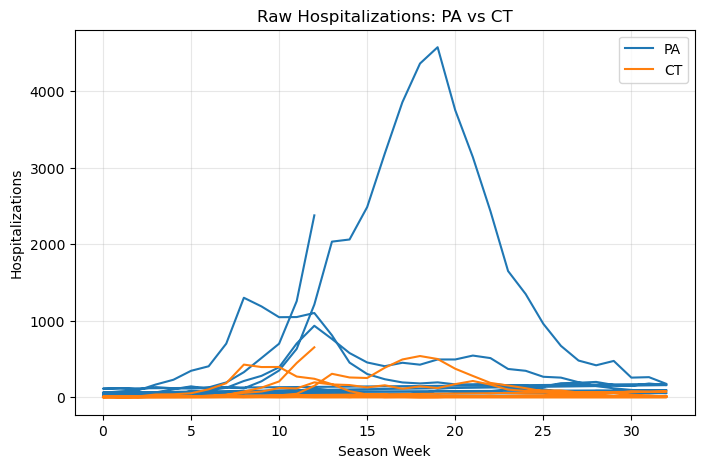

In [23]:
states = ["42", "09"]  # PA, CT
labels = {"42": "PA", "09": "CT"}

plt.figure(figsize=(8,5))

for s in states:
    sub = df[df["location"] == s]
    plt.plot(sub["season_week"], sub["value"], label=labels[s])

plt.xlabel("Season Week")
plt.ylabel("Hospitalizations")
plt.title("Raw Hospitalizations: PA vs CT")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Raw Hospitalizations: PA vs CT
This plot compares the raw number of hospitalizations between Pennsylvania (PA) and Connecticut (CT).  
Pennsylvania (Blue) looks like it has a much worse flu problem than Connecticut (Orange) because its lines are so much higher. However, this is mostly because Pennsylvania has a much larger population.  
This chart makes it clear that raw hospitalization numbers are heavily influenced by state size. Large states naturally show much higher flu hospitalization counts simply because they have more people, not necessarily because the flu is more severe there.  
On the other hand, smaller states appear almost insignificant on the same plot, even though they may be experiencing serious flu activity relative to their population. Because of this, comparing states using raw hospitalization counts gives a misleading picture of flu severity.
To make fair and meaningful comparisons across states, we need to adjust for these differences.      
As a result we will perform:
- population normalization, which accounts for state size, and
- z-score standardization, which allows us to compare how unusual a flu season is within each state.